In [1]:
import sympy as sy
sy.init_printing()

In [2]:
from sympy.vector import CoordSys3D
from sympy.vector import gradient, curl, divergence, laplacian
from sympy import symbols

# Tarea 5c

https://docs.sympy.org/latest/modules/vector/api/vectorfunctions.html

In [3]:
R3 = CoordSys3D('R3')

In [4]:
x,y,z,i,j,k=symbols('x y z i j k')

In [5]:
x=R3.x
y=R3.y
z=R3.z

i=R3.i
j=R3.j
k=R3.k

## 1. Gradiente

In [6]:
phi=x*(y**2)*(z**2)
phi

In [7]:
grd=gradient(phi)
grd

## 2. Divergencia

In [8]:
a=(x**2*y**2)*i+(y**2*z**2)*j+(x**2*z**2)*k
a

In [9]:
divg=divergence(a)
divg

## 3. Laplaciano

In [10]:
phi2=x*(y**2)*(z**3)
laplacian(phi2)

## 4. Checar identidades

https://docs.sympy.org/latest/modules/vector/fields.html

In [11]:
from sympy.vector import Del
delop=Del()

### a) $\nabla \times (\phi\vec{a}) = \nabla\phi\times\vec{a}+\phi\nabla\times\vec{a}$

término izquierdo

In [12]:
izq=delop^(phi*a)

término derecho

In [13]:
der=((grd).cross(a))+(phi*delop.cross(a))

Ahora restamos y debe dar cero

In [14]:
sy.simplify(izq-der)

### b) $\nabla \cdot (\nabla\phi \times \nabla\psi) = 0$

Ya que no tenemos un $\psi$ podemos suponer que $\psi$ se refiere al segundo $\phi$, al del problema 3. Sin embargo, el resultado no es igual a cero...

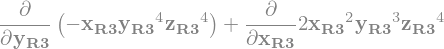

In [15]:
delop.dot((gradient(phi))^(gradient(phi2)))

Si suponemos ahora que $\psi$ y $\phi$ tienen la misma forma, el resultado es trivial pues el producto vectorial entre ambos es cero

In [16]:
delop.dot((gradient(phi))^(gradient(phi)))

### c) $\nabla\cdot(\nabla\times\vec{a})=0$

In [17]:
sy.simplify(delop.dot(delop^a))

## 5. Calcular el volumen entre los vectores 

In [18]:
a=i+2*j+3*k
b=4*i+5*j+6*k
c=7*i+8*j+10*k

In [19]:
a^b^c

In [20]:
(a^b^c).magnitude() #la magnitud del producto vectorial entre los 3 nos da el volumen

## 6. Serie de Fourier $f(x)=x^2$ para $0\leq x\leq2$

https://docs.sympy.org/latest/modules/series/fourier.html

In [21]:
from sympy import fourier_series, pi

In [22]:
x2 = symbols('x') #usamos x2 pues x ya lo definimos como R3.x

In [23]:
f1=x2**2
f1

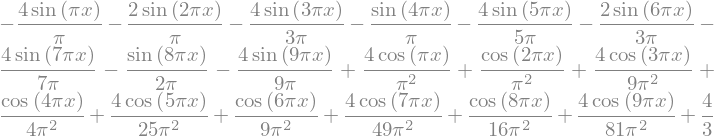

In [24]:
fou=fourier_series(f1,(x2,0,2)).truncate(10)
fou

Truncando a los primeros 10 términos de la serie, notamos que se cumple que:

$$x^2=\frac{4}{3} + 16 \sum_{r=1}^{\infty} \frac{(-1)^r}{\pi^2 r^2}\cos\left(\frac{\pi rx}{2}\right)$$

## 7. Transformada de Fourier de $f(t)$

https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.FourierTransform

In [25]:
from sympy import fourier_transform

In [26]:
t,tau=symbols('t \\tau')
f2=(1/(tau*sy.sqrt(2*pi)))*sy.exp((-t**2)/(2*tau**2))

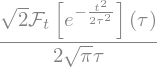

In [27]:
fourier_transform(f2,t,tau)

## 8. Transformada de Laplace de $f(t)$

https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.laplace_transform

In [28]:
from sympy import laplace_transform

Si $a>0$:

In [29]:
a1=symbols('a', positive=True)
s = symbols('s')
f3=sy.exp(a1*t)

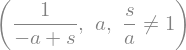

In [30]:
laplace_transform(f3,t,s)

Demás casos:

In [31]:
a2=symbols('a')
f4=sy.exp(a2*t)

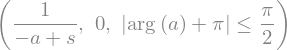

In [32]:
L=laplace_transform(f4,t,s)
L

Donde el término [0] es la transformada de laplace de $f$

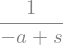

In [33]:
L[0]

## 9. Integral de línea

https://docs.sympy.org/latest/modules/integrals/integrals.html

https://github.com/sympy/sympy/issues/19320

In [34]:
from sympy import line_integrate, Curve

In [35]:
from sympy.abc import u

Notemos que la curva $C=(2u^2+u+1,u^2+1)$ toma los valores $(1,1)$ y $(4,2)$ en $u=0$ y $u=1$, respectivmamente. Así que así definiremos el intervalo, sobre $u$.

In [36]:
C = Curve([2*u**2+u+1,1+u**2],(u,0,1))
C

In [39]:
vectorfield=((x+y)*i)+((y-x)*j) #recordemos que x, y, i y j están definidos en la celda 5
vectorfield

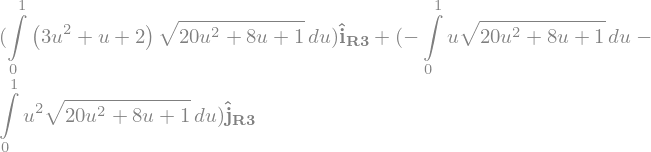

In [40]:
line_integrate(vectorfield,C,[x,y]).doit()

Traté de que integrara de varias maneras y nunca quiso, algún hint? incluso siguiendo sugerencias de notación usada por los desarrolladores en el segundo enlace de este ejercicio (arriba).